In [77]:
import networkx as nx
import pandas as pd

cities_df = pd.read_csv('airports\global-cities.dat', sep='|', header=None, names=['code', 'node_id', 'city'])
unique_nodes = cities_df['node_id'].nunique()
print(f'Number of unique nodes: {unique_nodes}')
edges_df = pd.read_csv('airports/global-net.dat', sep='\s+', header=None, names=['node1', 'node2'])
edges_df['node1'] = edges_df['node1'].astype(int)
edges_df['node2'] = edges_df['node2'].astype(int)

G = nx.Graph()
G.add_nodes_from(cities_df['node_id'])

for i, row in edges_df.iterrows():
    G.add_edge(row['node1'], row['node2'])

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f'Number of nodes: {num_nodes}')
print(f'Number of edges: {num_edges}')

Number of unique nodes: 3883
Number of nodes: 3883
Number of edges: 14142


In [78]:
components = list(nx.connected_components(G))
num_components = len(components)

largest_component = max(components, key=len)
G_largest = G.subgraph(largest_component)

num_nodes_largest = G_largest.number_of_nodes()
num_edges_largest = G_largest.number_of_edges()

print(f'Number of components: {num_components}')
print(f'Number of nodes in largest component: {num_nodes_largest}')
print(f'Number of edges in largest component: {num_edges_largest}')

Number of components: 266
Number of nodes in largest component: 3618
Number of edges in largest component: 14142


In [79]:
degree_degree = nx.degree_histogram(G)
top10_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:10]
top10_nodes = [(cities_df[cities_df['node_id'] == node]['city'].values[0], degree) for node, degree in top10_nodes]
print(f'Top 10 nodes by degree: {top10_nodes}')

Top 10 nodes by degree: [('Paris', 250), ('London (GB)', 242), ('Frankfurt', 237), ('Amsterdam', 192), ('Moscow', 186), ('Chicago', 184), ('New York', 179), ('Atlanta', 172), ('Dallas/Fort Worth', 147), ('Houston', 144)]


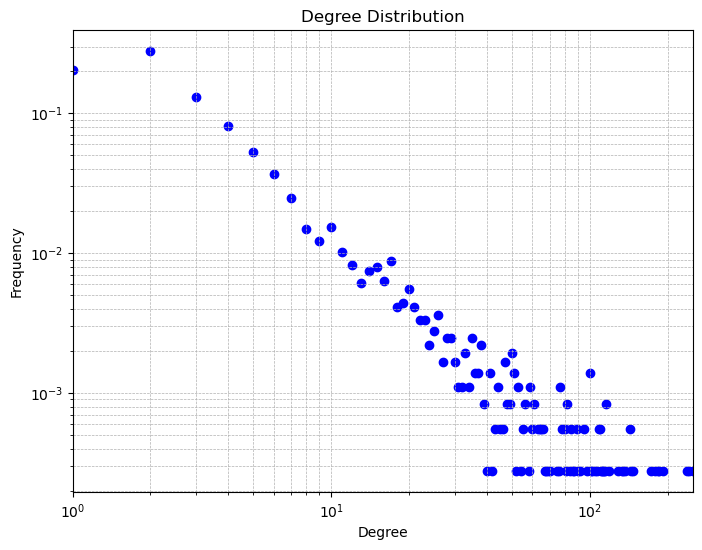

In [80]:
import matplotlib.pyplot as plt

degree_list = [degree for _, degree in G.degree]

degree_count = pd.Series(degree_list).value_counts().sort_index()
if 0 in degree_count.index:
    degree_count = degree_count.drop(0)

total_degree = sum(degree_count)
x = sorted(degree_count.index)
y = degree_count / total_degree

plt.figure(figsize=(8,6))
plt.scatter(x, y, marker='o', color='b')
plt.xscale('log', base=10)
plt.yscale('log', base=10)

plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')

if len(x) > 0:
    plt.xlim(min(x), max(x))

plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()

In [ ]:
diameter = nx.diameter(G_largest)
print(f'Diameter of largest component: {diameter}')

Diameter of largest component: 17


In [88]:
periphery_nodes = list(nx.periphery(G_largest))
print(f'Number of periphery nodes: {len(periphery_nodes)}')

endpoint1 = None
endpoint2 = None
for i, u in enumerate(periphery_nodes):
    for v in periphery_nodes[i+1:]:
        if nx.shortest_path_length(G_largest, u, v) == diameter:
            endpoint1, endpoint2 = u, v
            break
    if endpoint1 is not None:
        break

city1 = cities_df[cities_df['node_id'] == endpoint1]['city'].values[0]
city2 = cities_df[cities_df['node_id'] == endpoint2]['city'].values[0]
print(f'Endpoints of the diameter: {city1} and {city2}')

Number of periphery nodes: 2
Endpoints of the diameter: Brize Norton and Wasu


In [91]:
cbr = cities_df[cities_df['code'] == 'CBR']['node_id']
cpt = cities_df[cities_df['code'] == 'CPT']['node_id']
shortest_path = nx.shortest_path(G, cbr.values[0], cpt.values[0])
print(f'Shortest path between Canberra and Cape Town: {shortest_path}')

number_of_hops = len(shortest_path) - 1
print(f'Number of hops: {number_of_hops}')

passed_airports = [cities_df[cities_df['node_id'] == node]['city'].values[0] for node in shortest_path]
print(f'Airports passed: {passed_airports}')


Shortest path between Canberra and Cape Town: [501, 1908, 2043, 635]
Number of hops: 3
Airports passed: ['Canberra', 'Melbourne (AU)', 'Mauritius', 'Cape Town']


In [92]:
betweenness = nx.betweenness_centrality(G)
top10_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]
top10_cities = [(cities_df[cities_df['node_id'] == node]['city'].values[0], betweenness) for node, betweenness in top10_betweenness]
print(f'Top 10 cities by betweenness centrality: {top10_cities}')


Top 10 cities by betweenness centrality: [('Paris', 0.0810997264021592), ('London (GB)', 0.07378029634058736), ('Anchorage', 0.07077170263215267), ('Singapore', 0.06542330852757308), ('New York', 0.06014610641285109), ('Los Angeles (US)', 0.05751257975814715), ('Frankfurt', 0.056929059834720123), ('Port Moresby', 0.05584011372773346), ('Tokyo', 0.05229756056756155), ('Seattle', 0.04547067302197234)]
